<h1 align="center"> <font color='navy'>Project - Machine Learning & Statistics</font></h1>

## <font color='grey'>Libraries<font><a class='anchor' id='top'></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plt
import sklearn as sk

from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics

from rich.console import Console
from rich.markdown import Markdown
from rich.theme import Theme
custom_theme = Theme({
    "info": "grey46",
    "warning": "magenta",
    "danger": "bold red"
})

In [62]:
# Applying different colors to text for better results reading
# resource: https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

***

In [63]:
MARKDOWN = """
# Exploring Classification Algorithms

"""
console = Console(theme=custom_theme)
md = Markdown(MARKDOWN)
console.print(md, style="info")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                       Exploring Classification Algorithms                                       ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

><font color='crimson'>***Classification***</font> is determined as analyzing something, understanding the findings of this and then putting it to the correct category based on pre-defined rules. It can apply to phenomena or objects and can divide them into classes, sub-classes, divisions, sub-divisions and so on. These pre-defined rules, however, can be based on the past experience or on the same repeating pattern. 

><font color='crimson'>***Classification Algorithms***</font> is just simply an analysing of some input data in terms of probability or the likelihood of its existence in the relevant category to be able to predict the future. 

In [64]:
MARKDOWN = """
# The Iris Flower Data Set associated with Ronald A Fisher

"""
console = Console(theme=custom_theme)
md = Markdown(MARKDOWN)
console.print(md, style="info")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                            The Iris Flower Data Set associated with Ronald A Fisher                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

## <font color='grey'>Data Set<font><a class='anchor' id='top'></a>

In [65]:
filename = ('data/iris.csv')

In [66]:
df = pd.read_csv(filename)

In [67]:
# Show the DataFrame
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


***

## <font color='grey'>Overview and background of the DataFrame<font><a class='anchor' id='top'></a>
    
#### Summary of The DataFrame

><h5>Title:</h5>
The Iris Dataset

><h5>Creator:</h5>
Ronald A. Fisher

><h5>Date:</h5>
1936

><h5>Source:</h5>
https://archive.ics.uci.edu/dataset/53/iris
    
#### DataFrame Description and Relevant Information
    
>The Iris Dataset is probably the most well known data set in the world. It is widely used as a test case for many statistical classification techniques in machine learning. [<sup>5</sup>](#fn5)
    
>This dataset consists of **3** different species of iris flowers (setosa, virginica and versicolor), **50** samples per each flower class. Each class is measured by **4 features**: the <ins>`width`</ins> and the <ins>`length`</ins> of flower <ins>`petals`</ins> and <ins>`sepals`</ins>. Everything is measured in centimeters.   
***

## <font color='grey'>Statistical Analysis of the DataFrame<font><a class='anchor' id='top'></a>

In [68]:
# Check for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
# List of columns in the Data Set
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [70]:
# Summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [71]:
# Split of the Data Set
df.groupby(['class']).count().T

class,setosa,versicolor,virginica
sepal_length,50,50,50
sepal_width,50,50,50
petal_length,50,50,50
petal_width,50,50,50


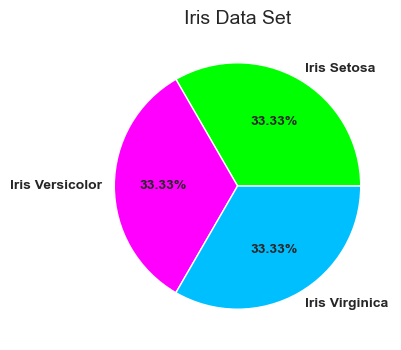

In [72]:
# Data Set visualisation
plt.figure(figsize=(4,4))

mylabels = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
mycolors = ['Lime', 'Fuchsia', 'Deepskyblue']
plt.title('Iris Data Set', size=14)

y = df['class'].value_counts()
plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.2f%%', textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.show()

In [73]:
MARKDOWN = """
# Supervised Learning & Classification Algorithms Explanation

"""
console = Console(theme=custom_theme)
md = Markdown(MARKDOWN)
console.print(md, style="info")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                           Supervised Learning & Classification Algorithms Explanation                           ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

><font color='crimson'>***Supervised Learning***</font> is a technique used in Machine Learning and, as the name suggests ,it is supervised by human during the whole process. The concept of this technique is that algorithm is getting input data the same time as the planned output and then is working to map one with the other during training procedure.

There is a lot of Supervised Learning Algorithms and they vary between each other, so it is important to pick the correct one, which will work the best with the problem, as there is no one algorithm which will work well with all problems.

There are <ins>`issues`</ins>, which need to be consider when choosing which Supervised Learning Algorithm to use and these are the 4 major ones: [<sup>4</sup>](#fn4)
- Bias-variance tradeoff
- Complexity of the function and how big the training data is
- How many dimensions the input data has
- What is the noise of the output

>Supervised Learning approach includes two types of algorithms: [<sup>1</sup>](#fn1)
>- **Classification** - where <ins>categorical</ins> values are predicted
>- **Regression** - where <ins>continuous</ins> values are predicted. [<sup>2</sup>](#fn2) For example this can be a predicion of salary if location, education level, work experience of the individual is known. [<sup>3</sup>](#fn3)

Different <ins>`types`</ins> of Supervised Learning Algorithms:
- Linear regression
- Logistic regression
- Decision trees
- Support-vector machines
- Naive Bayes
- K-nearest neighbor algorithm
- Similarity learning
- Linear discriminant analysis
- Neural networks (Multilayer perceptron)

Beside Supervised Learning approach there are also `other types` of `Machine Learning Classification Algorithms` like:
- Unsupervised Learning approach (Dimensionality reduction & Clustering)
- Semi-supervised Learning approach (combination of supervised and unsupervised approaches)
- Reinforcement Learning


***
## <font color='grey'>Machine Learning<font><a class='anchor' id='top'></a>
   
#### Using popular Classification Algorithms: [<sup>2</sup>](#fn2)
- 1st - LogisticRegression
- 2nd - Naive Bayes
- 3rd - K-Nearest Neighbors
- 4th - Decision Tree
- 5th - Support Vector Machines
***    

In [74]:
# Checking and preparing data before applying Machine Learning Models
dict(df.dtypes)

{'sepal_length': dtype('float64'),
 'sepal_width': dtype('float64'),
 'petal_length': dtype('float64'),
 'petal_width': dtype('float64'),
 'class': dtype('O')}

In [75]:
# Splitting data into X and y values
# X values
X = df.drop('class',axis=1)

# Show X
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
# y values
y = df['class']

# Show y
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [77]:
# Creating training & testing by splitting randomly the DataFrame  
# resource: https://www.analyticsvidhya.com/blog/2022/06/iris-flowers-classification-using-machine-learning/
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [78]:
# View each shape after splitting
X_train.shape

(112, 4)

In [79]:
X_test.shape

(38, 4)

In [80]:
y_train.shape

(112,)

In [81]:
y_test.shape

(38,)

1st Model - **Logistic Regression** predicts that y is between 0 and 1 range.

In [82]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Create a new instance of a classifier
logR = LogisticRegression()

# Fit the training data
logR.fit(X_train, y_train)

LogisticRegression()

In [83]:
# Model score is
print(f'Model score of LogisticRegression is:\n')
print(color.BOLD + f'{logR.score(X_train, y_train)*100:.2f}%'+ color.END)

Model score of LogisticRegression is:

98.21%


In [84]:
# Predict the results of the testing data
logR_y_pred = logR.predict(X_test)

# Show
logR_y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [85]:
# Probability estimate of the testing data
logR.predict_proba(X_test)

array([[1.16478077e-04, 5.59628388e-02, 9.43920683e-01],
       [1.26376707e-02, 9.60278185e-01, 2.70841441e-02],
       [9.84387613e-01, 1.56123478e-02, 3.88378199e-08],
       [1.25744218e-06, 2.34270833e-02, 9.76571659e-01],
       [9.70279266e-01, 2.97205694e-02, 1.64455658e-07],
       [2.00328903e-06, 5.98055264e-03, 9.94017444e-01],
       [9.81923016e-01, 1.80769129e-02, 7.13272690e-08],
       [2.83158387e-03, 7.47763427e-01, 2.49404990e-01],
       [1.50570933e-03, 7.39107728e-01, 2.59386562e-01],
       [2.04762671e-02, 9.35792649e-01, 4.37310835e-02],
       [9.19748648e-05, 1.59958522e-01, 8.39949504e-01],
       [6.95142103e-03, 8.10311163e-01, 1.82737416e-01],
       [4.06664323e-03, 7.93738920e-01, 2.02194437e-01],
       [3.04621099e-03, 7.60982410e-01, 2.35971379e-01],
       [3.85830361e-03, 7.10393729e-01, 2.85747967e-01],
       [9.63184099e-01, 3.68157168e-02, 1.84263613e-07],
       [6.69341909e-03, 7.56235901e-01, 2.37070680e-01],
       [1.13794844e-02, 8.44613

In [86]:
# Accuracy score of LogisticRegression Model
print(f'Accuracy score of LogisticRegression Model is:\n')
print(color.BOLD + f'{accuracy_score(logR_y_pred,y_test)*100:.2f}%'+ color.END)

Accuracy score of LogisticRegression Model is:

97.37%


In [87]:
# Classification Report for LogisticRegression Model
print(color.BOLD +'Classification Report for LogisticRegression Model:\n\n'
      + color.END, classification_report(logR_y_pred,y_test))

Classification Report for LogisticRegression Model:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



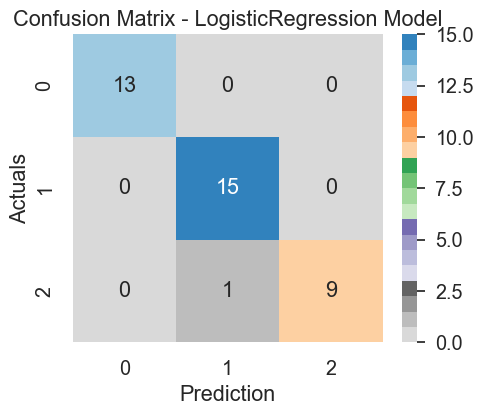

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]], dtype=int64)

In [88]:
# Confusion Matrix for LogisticRegression Model
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# resource: https://stackoverflow.com/questions/57043260/how-change-the-color-of-boxes-in-confusion-matrix-using-sklearn

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(logR_y_pred,y_test),annot=True, cmap='tab20c_r')
plt.title('Confusion Matrix - LogisticRegression Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

confusion_matrix(logR_y_pred,y_test)

***
<font color='grey'>***Interpretation:***</font>

Model predicts correctly **setosa** class (0) **11** times 

Model predicts correctly **versicolor** class (1) **12** times

Model predicts correctly **virginica** class (2) **6** times

Model predicts 1 time versicolor class where actual is virginica
***

2nd Model - **Naive Bayes**

In [89]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# Create a new instance of a classifier
gNB = GaussianNB()

# Fit the training data
gNB.fit(X_train, y_train)

GaussianNB()

In [90]:
# Model score is
print(f'Model score of GaussianNB is:\n')
print(color.BOLD + f'{gNB.score(X_train, y_train)*100:.2f}%'+ color.END)

Model score of GaussianNB is:

94.64%


In [91]:
# Predict the results of the testing data
gNB_y_pred = gNB.predict(X_test)

# Show
gNB_y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype='<U10')

In [92]:
# Accuracy score of GaussianNB Model
print(f'Accuracy score of GaussianNB Model is:\n')
print(color.BOLD + f'{accuracy_score(gNB_y_pred,y_test)*100:.2f}%'+ color.END)

Accuracy score of GaussianNB Model is:

100.00%


In [93]:
# Classification Report for GaussianNB Model
print(color.BOLD +'Classification Report for GaussianNB Model:\n\n'
      + color.END, classification_report(gNB_y_pred,y_test))

Classification Report for GaussianNB Model:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



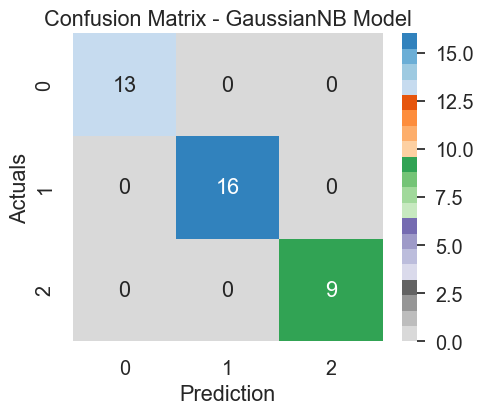

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

In [94]:
# Confusion Matrix for GaussianNB Model

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(gNB_y_pred,y_test),annot=True, cmap='tab20c_r')
plt.title('Confusion Matrix - GaussianNB Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

confusion_matrix(gNB_y_pred,y_test)

***
<font color='grey'>***Interpretation:***</font>

Model predicts correctly **setosa** class (0) **13** times 

Model predicts correctly **versicolor** class (1) **16** times

Model predicts correctly **virginica** class (2) **9** times

Model predicts everything correctly
***

3rd Model - **K-Nearest Neighbors**

In [95]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# Create a new instance of a classifier
kNN = sk.neighbors.KNeighborsClassifier()

# Fit the data
kNN.fit(X, y)

KNeighborsClassifier()

In [96]:
# Model score is
print(f'Model score of KNeighborsClassifier is:\n')
print(color.BOLD + f'{kNN.score(X_train, y_train)*100:.2f}%'+ color.END)

Model score of KNeighborsClassifier is:

96.43%


In [97]:
# Predict the results of the testing data
kNN_y_pred = kNN.predict(X_test)

# Show
kNN_y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [98]:
# Accuracy score of KNeighborsClassifier Model
print(f'Accuracy score of KNeighborsClassifier Model is:\n')
print(color.BOLD + f'{accuracy_score(kNN_y_pred,y_test)*100:.2f}%'+ color.END)

Accuracy score of KNeighborsClassifier Model is:

97.37%


In [99]:
# Classification Report for KNeighborsClassifier Model
print(color.BOLD +'Classification Report for KNeighborsClassifier Model:\n\n'
      + color.END, classification_report(kNN_y_pred,y_test))

Classification Report for KNeighborsClassifier Model:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



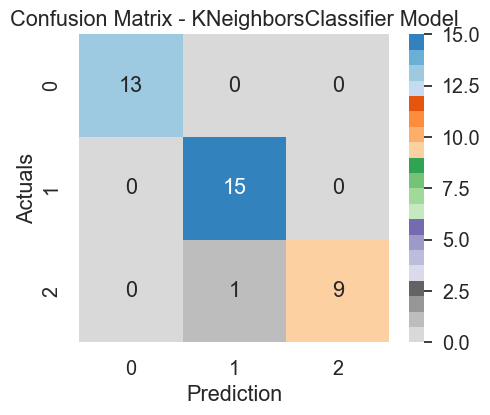

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]], dtype=int64)

In [100]:
# Confusion Matrix for KNeighborsClassifier Model

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(kNN_y_pred,y_test),annot=True, cmap='tab20c_r')
plt.title('Confusion Matrix - KNeighborsClassifier Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

confusion_matrix(kNN_y_pred,y_test)

***
<font color='grey'>***Interpretation:***</font>

Model predicts correctly **setosa** class (0) **13** times 

Model predicts correctly **versicolor** class (1) **15** times

Model predicts correctly **virginica** class (2) **9** times

Model predicts 1 time versicolor class where actual is virginica
***

4th Model - **Decision Tree**

*1.10. Decision Trees*, Available at: https://scikit-learn.org/stable/modules/tree.html#classification (Accessed 25 Nov 2023)

In [101]:
# Create a new instance of a classifier
dT = tree.DecisionTreeClassifier()

# Fit the data
dT.fit(X, y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

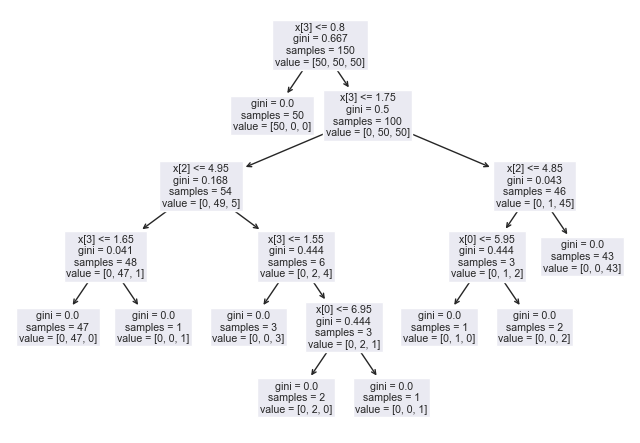

In [102]:
tree.plot_tree(dT)

In [103]:
# Model score is
print(f'Model score of DecisionTreeClassifier is:\n')
print(color.BOLD + f'{dT.score(X_train, y_train)*100:.2f}%'+ color.END)

Model score of DecisionTreeClassifier is:

100.00%


In [104]:
# Predict the results of the testing data
dT_y_pred = dT.predict(X_test)

# Show
dT_y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype=object)

In [105]:
# Accuracy score of DecisionTreeClassifier Model
print(f'Accuracy score of DecisionTreeClassifier Model is:\n')
print(color.BOLD + f'{accuracy_score(dT_y_pred,y_test)*100:.2f}%'+ color.END)

Accuracy score of DecisionTreeClassifier Model is:

100.00%


In [106]:
# Classification Report for DecisionTreeClassifier Model
print(color.BOLD +'Classification Report for DecisionTreeClassifier Model:\n\n'
      + color.END, classification_report(dT_y_pred,y_test))

Classification Report for DecisionTreeClassifier Model:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



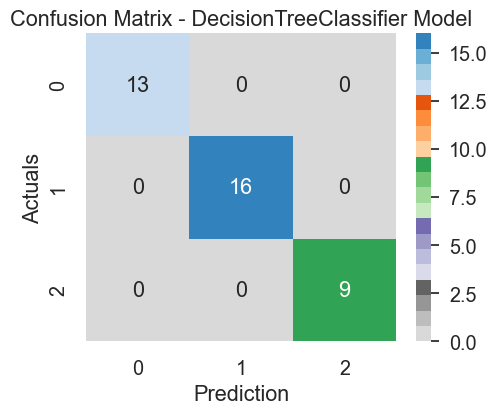

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

In [107]:
# Confusion Matrix for DecisionTreeClassifier Model

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(dT_y_pred,y_test),annot=True, cmap='tab20c_r')
plt.title('Confusion Matrix - DecisionTreeClassifier Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

confusion_matrix(dT_y_pred,y_test)

***
<font color='grey'>***Interpretation:***</font>

Model predicts correctly **setosa** class (0) **13** times 

Model predicts correctly **versicolor** class (1) **16** times

Model predicts correctly **virginica** class (2) **9** times

Model predicts everything correctly
***

5th Model - **Support Vector Machines**

*1.4. Support Vector Machines*, Available at: https://scikit-learn.org/stable/modules/svm.html (Accessed: 25 Nov 2023)

In [108]:
# Create a new instance of a classifier
vM = svm.SVC()

# Fit the data
vM.fit(X, y)

SVC()

In [109]:
# Model score is
print(f'Model score of SupportVectorMachines is:\n')
print(color.BOLD + f'{vM.score(X_train, y_train)*100:.2f}%'+ color.END)

Model score of SupportVectorMachines is:

97.32%


In [110]:
# Predict the results of the testing data
vM_y_pred = vM.predict(X_test)

# Show
vM_y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [111]:
# Accuracy score of SupportVectorMachines Model
print(f'Accuracy score of SupportVectorMachines Model is:\n')
print(color.BOLD + f'{accuracy_score(vM_y_pred,y_test)*100:.2f}%'+ color.END)

Accuracy score of SupportVectorMachines Model is:

97.37%


In [112]:
# Classification Report for SupportVectorMachines Model
print(color.BOLD +'Classification Report for SupportVectorMachines Model:\n\n'
      + color.END, classification_report(vM_y_pred,y_test))

Classification Report for SupportVectorMachines Model:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



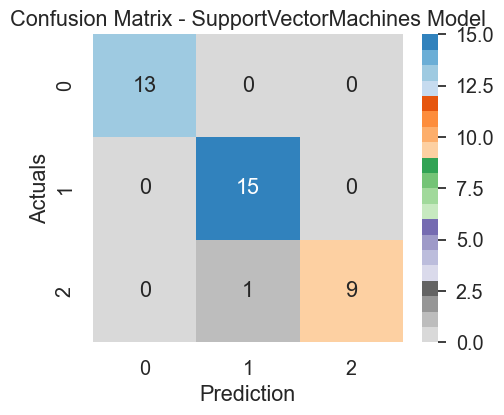

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]], dtype=int64)

In [113]:
# Confusion Matrix for SupportVectorMachines Model

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(vM_y_pred,y_test),annot=True, cmap='tab20c_r')
plt.title('Confusion Matrix - SupportVectorMachines Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

confusion_matrix(vM_y_pred,y_test)

***
<font color='grey'>***Interpretation:***</font>

Model predicts correctly **setosa** class (0) **13** times 

Model predicts correctly **versicolor** class (1) **15** times

Model predicts correctly **virginica** class (2) **9** times

Model predicts 1 time versicolor class where actual is virginica
***

### <font color='grey'>Results Comparision<font><a class='anchor' id='top'></a>

#### Models score comparision

In [114]:
print("="*32)
print(color.BOLD + f'LogisticRegression: {logR.score(X_train, y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + color.RED + f'GaussianNB: {gNB.score(X_train, y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'KNeighborsClassifier: {kNN.score(X_train, y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + color.GREEN + f'DecisionTreeClassifier: {dT.score(X_train, y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'SupportVectorMachines: {vM.score(X_train, y_train)*100:.2f}%'+ color.END)
print("="*32)

LogisticRegression: 98.21% 

GaussianNB: 94.64% 

KNeighborsClassifier: 96.43% 

DecisionTreeClassifier: 100.00% 

SupportVectorMachines: 97.32%


***
<font color='grey'>***Observations:***</font>
>The **highest model score** to test the Iris Data Set has **Decision Tree Classifier** Model

>**Gaussian Naive Bayes** is **the worst** from all the five models
***

| Model      | Model Score |
| :---        |    :----:   |     
| LogisticRegression   | 98.21%         | 
| GaussianNB   | 94.64%         | 
| KNeighborsClassifier   | 96.43%        | 
| DecisionTreeClassifier   | 100.00%         | 
| SupportVectorMachines   | 97.32%        | 

#### Models accuracy comparision

In [115]:
print("="*32)
print(color.BOLD + f'LogisticRegression: {accuracy_score(logR_y_pred,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + color.GREEN + f'GaussianNB: {accuracy_score(gNB_y_pred,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'KNeighborsClassifier: {accuracy_score(kNN_y_pred,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + color.GREEN + f'DecisionTreeClassifier: {accuracy_score(dT_y_pred,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'SupportVectorMachines: {accuracy_score(vM_y_pred,y_test)*100:.2f}%'+ color.END)
print("="*32)

LogisticRegression: 97.37% 

GaussianNB: 100.00% 

KNeighborsClassifier: 97.37% 

DecisionTreeClassifier: 100.00% 

SupportVectorMachines: 97.37%


***
<font color='grey'>***Observations:***</font>
>**Gaussian Naive Bayes** and **Decision Tree Classifier** have the highest accuracy of **100%**

>All other three models have the same accuracy of **97.37%**
***

| Model      | Accuracy Score |
| :---        |    :----:   |     
| LogisticRegression   | 97.37%         | 
| GaussianNB   | 100.00%         | 
| KNeighborsClassifier   | 97.37%        | 
| DecisionTreeClassifier   | 100.00%         | 
| SupportVectorMachines   | 97.37%       | 

#### Confusion matrixes comparision

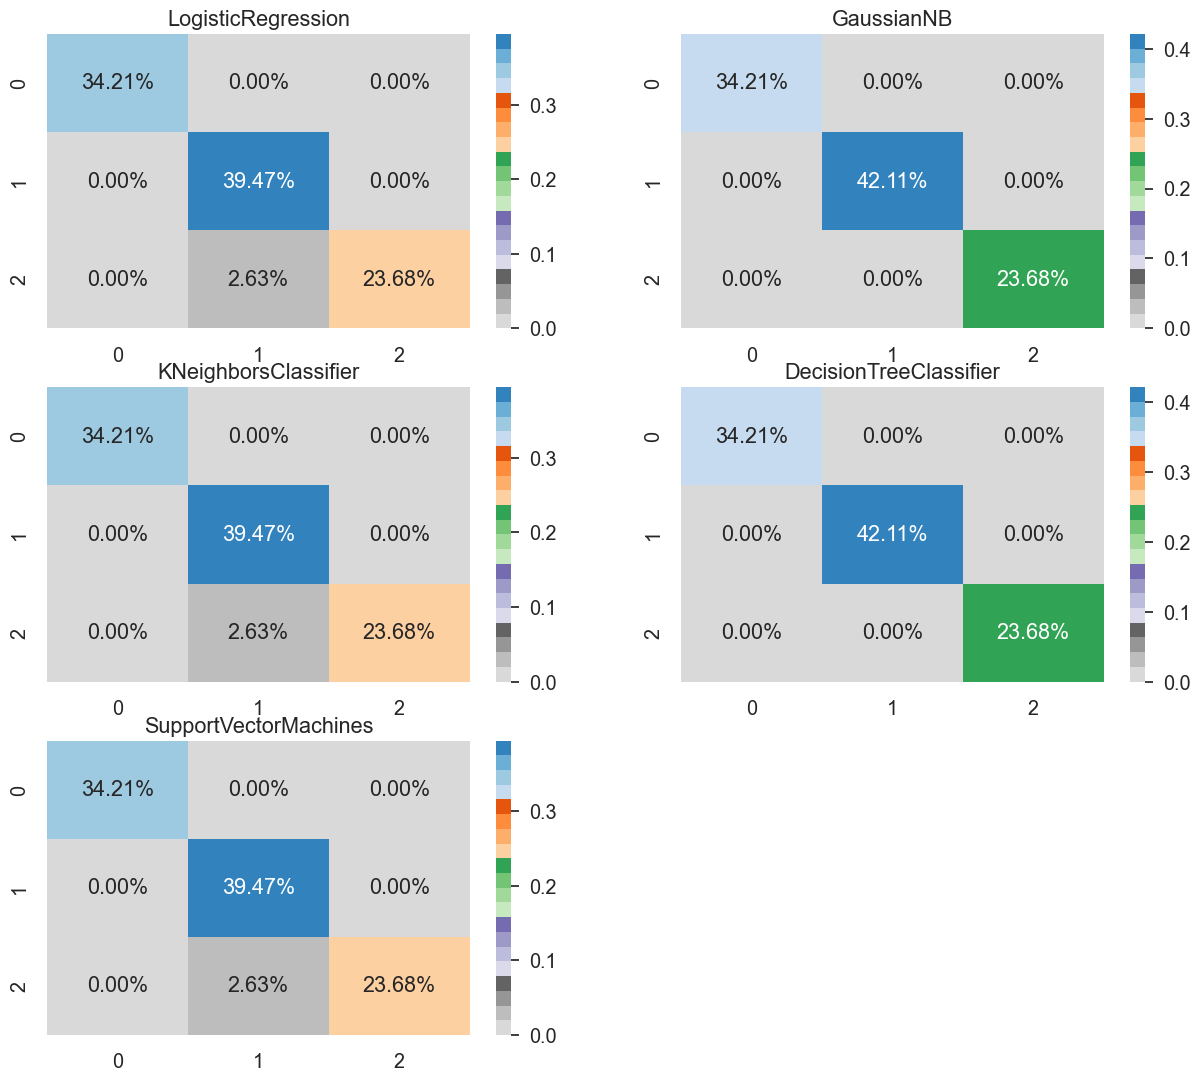

In [116]:
# resource: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# resource: https://matplotlib.org/2.0.2/users/gridspec.html

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 13))
sns.set(font_scale = 1.3)

plt.subplot2grid((3,2),(0, 0))
ax = sns.heatmap(confusion_matrix(logR_y_pred,y_test)/
                 np.sum(confusion_matrix(logR_y_pred,y_test)) ,annot=True, fmt='.2%', cmap='tab20c_r')
plt.title('LogisticRegression')

plt.subplot2grid((3,2),(0, 1))
ax = sns.heatmap(confusion_matrix(gNB_y_pred,y_test)/
                 np.sum(confusion_matrix(gNB_y_pred,y_test)) ,annot=True, fmt='.2%', cmap='tab20c_r')
plt.title('GaussianNB')

plt.subplot2grid((3,2),(1, 0))
ax = sns.heatmap(confusion_matrix(kNN_y_pred,y_test)/
                 np.sum(confusion_matrix(kNN_y_pred,y_test)), annot=True, fmt='.2%', cmap='tab20c_r')
plt.title('KNeighborsClassifier')

plt.subplot2grid((3,2),(1, 1))
ax = sns.heatmap(confusion_matrix(dT_y_pred,y_test)/
                 np.sum(confusion_matrix(dT_y_pred,y_test)), annot=True, fmt='.2%', cmap='tab20c_r')
plt.title('DecisionTreeClassifier')

plt.subplot2grid((3,2),(2, 0))
ax = sns.heatmap(confusion_matrix(vM_y_pred,y_test)/
                 np.sum(confusion_matrix(vM_y_pred,y_test)), annot=True, fmt='.2%', cmap='tab20c_r')
plt.title('SupportVectorMachines')

# Show
plt.show()

***
<font color='grey'>***Observations:***</font>
>All Models predicts correctly setosa class (0) in 34.21%

>2 Models predicts correctly versicolor class (1) in 42.11%

>All Models predicts correctly virginica class (2) in 23.68%

> 3 Models predicts 1 time versicolor class where actual is virginica
***

### <font color='grey'>References:<font><a class='anchor' id='top'></a>

<span id="fn1">**1.** Mayank Banoula <i>Classification in Machine Learning: What it is & Classification Models</i>, Available at: https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning (Accessed: 12 Nov 2023)</span>

<span id="fn2">**2.**<i> 5 Types of Classification Algorithms in Machine Learning + Real-World Projects</i>, Available at: https://omdena.com/blog/machine-learning-classification-algorithms/ (Accessed: 12 Nov 2023)</span>
   
<span id="fn3">**3.** Zoumana Keita <i>Classification in Machine Learning: An Introduction</i>, Available at: https://www.datacamp.com/blog/classification-machine-learning (Accessed: 12 Nov 2023)</span>

<span id="fn4">**4.** <i>Supervised learning</i>, Available at: https://en.wikipedia.org/wiki/Supervised_learning#How_supervised_learning_algorithms_work (Accessed: 12 Nov 2023)</span>

<span id="fn5">**5.** <i>Iris flower data set</i>, Available at: https://en.wikipedia.org/wiki/Iris_flower_data_set (Accessed: 19 Nov 2023)</span>

***

## End